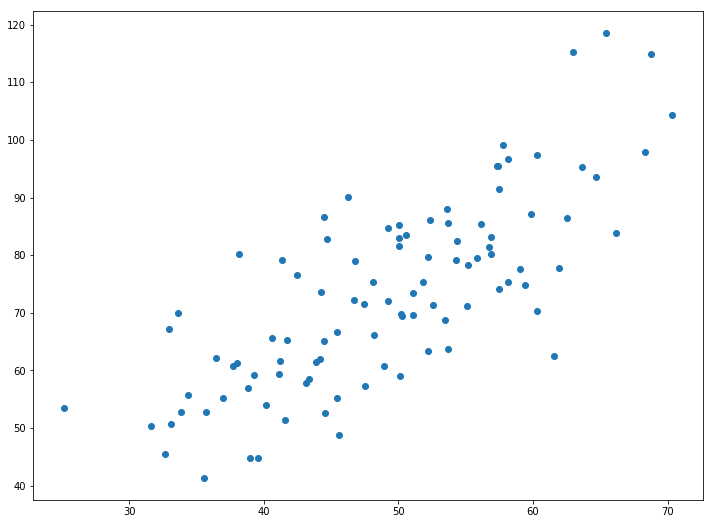

In [88]:
# Making the imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 9.0)

# Preprocessing Input data
data = pd.read_csv('../01.Linear_Regression_with_Gradient_Descent/data.csv')
X = data.iloc[:, 0]
Y = data.iloc[:, 1]
plt.scatter(X, Y)
plt.show()

In [130]:
print(Y[:5])
print(X[:5])

0    68.777596
1    62.562382
2    71.546632
3    87.230925
4    78.211518
Name: 31.70700584656992, dtype: float64
0    53.426804
1    61.530358
2    47.475640
3    59.813208
4    55.142188
Name: 32.502345269453031, dtype: float64


In [90]:
# Getting input size
print(X.shape)
n = X.shape[0]
n

(99,)


99

In [131]:
# Random Initialization
# We use `m` but think it like, `theta`, `beta`, `a` etc.
# See different notations above
# https://towardsdatascience.com/vectorization-implementation-in-machine-learning-ca652920c55d
# https://www.stat.cmu.edu/~cshalizi/mreg/15/lectures/13/lecture-13.pdf
# https://www.pugetsystems.com/labs/hpc/Machine-Learning-and-Data-Science-Linear-Regression-Part-5-974/
m = np.random.rand(n)
c = np.zeros(n)
print(m[:10])
print(c[:10])

[0.72476394 0.01174746 0.37777556 0.68334914 0.23417858 0.04220305
 0.1502587  0.74975886 0.29376378 0.40818531]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [132]:
y = 0
for j in range(n):
    y += m[j]*X[j] + c[j]
y

2444.2457506311234

In [133]:
%%time
# hypothesis for all the samples For Loop
all_y = []
for i in range(n):
    y_i = 0
    y_i += m[i]*X[i] + c[i]
    all_y.append(y_i)

print(all_y[:10])

[38.72182122346973, 0.7228253131189232, 17.935136470959883, 40.8733043360208, 12.913119187853612, 2.20349691009686, 5.905101683074863, 36.067181124091036, 15.437291023311431, 18.539666660213072]
CPU times: user 3.79 ms, sys: 0 ns, total: 3.79 ms
Wall time: 3.68 ms


In [ ]:
%%time
# Calculating predicted Y values Matrix
m.T@X + c

In [134]:
%%time
# cost function For Loop
cost = 0
for i in range(n):
    y_i = 0
    y_i += m[i]*X[i] + c[i]
    cost_i = (Y[i] - y_i)**2
    cost += cost_i
cost = (1/(2*n))*cost
print(cost)

1320.9158059067868
CPU times: user 2.57 ms, sys: 0 ns, total: 2.57 ms
Wall time: 2.39 ms


In [113]:
%%time
# cost function Matrix
cost = (1/(2*n))*np.transpose((m.T@X + c - Y))@(m.T@X + c - Y)
print(cost)

2829909.630091151
CPU times: user 1.67 ms, sys: 0 ns, total: 1.67 ms
Wall time: 1.51 ms


In [135]:
%%time
# Calculating partial derivatives with respect to m and c from cost function
# Doing Gradient Descent
# m = np.ones(n)
# c = np.zeros(n)
L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

for _ in range(epochs):
    for i in range(n):
        d_m_sum = 0
        d_c_sum = 0
        y_i = m[i]*X[i] + c[i]
        D_m = X[i]*(Y[i] - y_i)
        D_c = Y[i] - y_i
        d_m_sum += D_m
        d_c_sum += D_c
        D_m_sum = (-2/n)*d_m_sum
        D_c_sum = (-2/n)*d_c_sum
        m[i] = m[i] - L*D_m_sum
        c[i] = c[i] - L*D_c_sum

print(m[:10])
print(c[:10])

[1.28539887 1.01604299 1.49477672 1.45762536 1.41548031 1.51890705
 1.44538206 1.55811079 1.352491   1.20183313]
[0.01049351 0.01632195 0.02352788 0.0129449  0.02142283 0.02828296
 0.03295516 0.01680389 0.02014704 0.01747364]
CPU times: user 3.57 s, sys: 3.62 ms, total: 3.58 s
Wall time: 3.57 s


In [136]:
%%time
# hypothesis for all the samples For Loop
Y_pred = []
for i in range(n):
    y_i = 0
    y_i += m[i]*X[i] + c[i]
    Y_pred.append(y_i)

print(Y[:10])
print(Y_pred[:10])

0    68.777596
1    62.562382
2    71.546632
3    87.230925
4    78.211518
5    79.641973
6    59.171489
7    75.331242
8    71.300880
9    55.165677
Name: 31.70700584656992, dtype: float64
[68.68524690114381, 62.533810822673644, 70.98900860554153, 87.19819336172364, 78.07410452412063, 79.33314907637488, 56.83584390398148, 74.96978856691798, 71.0935687068219, 54.60440991206793]
CPU times: user 3.23 ms, sys: 0 ns, total: 3.23 ms
Wall time: 2.9 ms


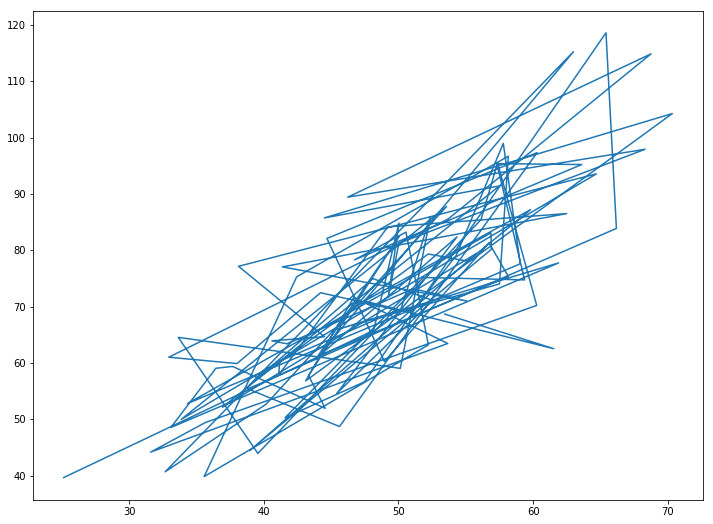

In [138]:
#print(m)
#print(c)
#Y_pred = m.T@X + c
#plt.scatter(X, Y)
#plt.scatter(X, Y_pred)
line, = plt.plot(X, Y_pred)
plt.show()

In [ ]:
m = np.ones(n)
c = np.zeros(n)
print(m)
print(c)

for _ in range(100):
    Y_pred = m.T@X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c

print(m)
Y_pred = m.T@X + c
print(Y_pred)
line, = plt.plot(X, Y_pred)
plt.show()